# Building a USD Libor Dual Curve and Valuing a Swap

We build an OIS curve from OIS swaps that include forward starting OIS using MM dates.

This follows example mentioned in the blogpost at https://blog.deriscope.com/index.php/en/excel-ois-discounted-usd-libor-curve

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import *
from financepy.products.rates import *

####################################################################
# FINANCEPY BETA Version 0.185 - This build:  19 Nov 2020 at 22:37 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#      Send any bug reports or comments to quant@financepy.com     #
####################################################################



In [3]:
valuation_date = Date(22, 5, 2019)

In [4]:
interp_type = InterpTypes.LINEAR_ZERO_RATES

In [5]:
valuation_date.next_imm_date()

19-JUN-2019

## Building USD Single Curve

In [6]:
# Need to specify a UK calendar (trade was done in London)
cal = CalendarTypes.UNITED_KINGDOM

depoDCCType = DayCountTypes.ACT_360
depos = []
spot_days = 2
settlement_date = valuation_date.add_weekdays(spot_days)
depo = IborDeposit(settlement_date, "3M", 2.523380000/100.0, depoDCCType, calendar_type=cal); depos.append(depo)

fraDCCType = DayCountTypes.ACT_360

f1 = valuation_date.next_imm_date()
f2 = f1.next_imm_date()
f3 = f2.next_imm_date()
f4 = f3.next_imm_date()
f5 = f4.next_imm_date()
f6 = f5.next_imm_date()
f7 = f6.next_imm_date()

fras = []
fra = IborFRA(f1, f2, 2.524910280/100.0, fraDCCType, calendar_type=cal); fras.append(fra)
fra = IborFRA(f2, f3, 2.434411307/100.0, fraDCCType, calendar_type=cal); fras.append(fra)
fra = IborFRA(f3, f4, 2.373650291/100.0, fraDCCType, calendar_type=cal); fras.append(fra)
fra = IborFRA(f4, f5, 2.237622952/100.0, fraDCCType, calendar_type=cal); fras.append(fra)
fra = IborFRA(f5, f6, 2.136343383/100.0, fraDCCType, calendar_type=cal); fras.append(fra)
fra = IborFRA(f6, f7, 2.074814539/100.0, fraDCCType, calendar_type=cal); fras.append(fra)

swaps = []
swapType = SwapTypes.PAY
fixedDCCType = DayCountTypes.THIRTY_E_360_ISDA
fixedFreqType = FrequencyTypes.SEMI_ANNUAL

swap = IborSwap(settlement_date, "2Y", swapType, 2.289249897/100.0, fixedFreqType, fixedDCCType, calendar_type=cal); swaps.append(swap)
swap = IborSwap(settlement_date, "3Y", swapType, 2.218399525/100.0, fixedFreqType, fixedDCCType, calendar_type=cal); swaps.append(swap)
swap = IborSwap(settlement_date, "4Y", swapType, 2.200400352/100.0, fixedFreqType, fixedDCCType, calendar_type=cal); swaps.append(swap)
swap = IborSwap(settlement_date, "5Y", swapType, 2.209749699/100.0, fixedFreqType, fixedDCCType, calendar_type=cal); swaps.append(swap)
swap = IborSwap(settlement_date, "6Y", swapType, 2.233999729/100.0, fixedFreqType, fixedDCCType, calendar_type=cal); swaps.append(swap)
swap = IborSwap(settlement_date, "7Y", swapType, 2.262149811/100.0, fixedFreqType, fixedDCCType, calendar_type=cal); swaps.append(swap)
swap = IborSwap(settlement_date, "8Y", swapType, 2.293599606/100.0, fixedFreqType, fixedDCCType, calendar_type=cal); swaps.append(swap)
swap = IborSwap(settlement_date, "9Y", swapType, 2.326499939/100.0, fixedFreqType, fixedDCCType, calendar_type=cal); swaps.append(swap)
swap = IborSwap(settlement_date, "10Y", swapType, 2.358519554/100.0, fixedFreqType, fixedDCCType, calendar_type=cal); swaps.append(swap)
swap = IborSwap(settlement_date, "11Y", swapType, 2.388500214/100.0, fixedFreqType, fixedDCCType, calendar_type=cal); swaps.append(swap)
swap = IborSwap(settlement_date, "12Y", swapType, 2.416099548/100.0, fixedFreqType, fixedDCCType, calendar_type=cal); swaps.append(swap)
swap = IborSwap(settlement_date, "15Y", swapType, 2.475949764/100.0, fixedFreqType, fixedDCCType, calendar_type=cal); swaps.append(swap)
swap = IborSwap(settlement_date, "20Y", swapType, 2.528799534/100.0, fixedFreqType, fixedDCCType, calendar_type=cal); swaps.append(swap)
swap = IborSwap(settlement_date, "25Y", swapType, 2.545499325/100.0, fixedFreqType, fixedDCCType, calendar_type=cal); swaps.append(swap)
swap = IborSwap(settlement_date, "30Y", swapType, 2.551049709/100.0, fixedFreqType, fixedDCCType, calendar_type=cal); swaps.append(swap)
swap = IborSwap(settlement_date, "40Y", swapType, 2.534699440/100.0, fixedFreqType, fixedDCCType, calendar_type=cal); swaps.append(swap)
swap = IborSwap(settlement_date, "50Y", swapType, 2.504999638/100.0, fixedFreqType, fixedDCCType, calendar_type=cal); swaps.append(swap)

iborDepos = depos.copy()
iborFras = fras.copy()
ibor_swaps = swaps.copy()

In [7]:
iborSingleCurve = IborSingleCurve(valuation_date, iborDepos, iborFras, ibor_swaps, interp_type)

Inserting synthetic deposit


In [8]:
for depo in iborDepos:
    dt = depo._maturity_date
    df = iborSingleCurve.df(dt) / iborSingleCurve.df(settlement_date)
    ccZeroRate = iborSingleCurve.zero_rate(dt, FrequencyTypes.CONTINUOUS, DayCountTypes.ACT_360)
    print("%12s %12.9f %9.6f"% (dt, df, ccZeroRate*100))

for fra in iborFras:
    dt = fra._maturity_date
    df = iborSingleCurve.df(dt) / iborSingleCurve.df(settlement_date)
    ccZeroRate = iborSingleCurve.zero_rate(dt, FrequencyTypes.CONTINUOUS, DayCountTypes.ACT_360)
    print("%12s %12.9f %9.6f"% (dt, df, ccZeroRate*100))
    
for swap in ibor_swaps:
    dt = swap._maturity_date
    df = iborSingleCurve.df(dt) / iborSingleCurve.df(settlement_date)
    ccZeroRate = iborSingleCurve.zero_rate(dt, FrequencyTypes.CONTINUOUS, DayCountTypes.ACT_360)
    print("%12s %12.9f %9.6f"% (dt, df, ccZeroRate*100))

FRI 24 MAY 2019  1.000000000  2.523203
TUE 27 AUG 2019  0.993385128  2.515184
WED 18 SEP 2019  0.991850650  2.517857
WED 18 DEC 2019  0.985784477  2.478465
WED 18 MAR 2020  0.979904988  2.444632
WED 17 JUN 2020  0.974393609  2.395113
WED 16 SEP 2020  0.969159950  2.345276
WED 16 DEC 2020  0.964103545  2.301539
MON 24 MAY 2021  0.955542506  2.240360
TUE 24 MAY 2022  0.936048300  2.171422
WED 24 MAY 2023  0.916298215  2.154429
FRI 24 MAY 2024  0.896031562  2.163539
TUE 27 MAY 2025  0.875061736  2.189184
TUE 26 MAY 2026  0.854102795  2.218813
MON 24 MAY 2027  0.832956272  2.252023
WED 24 MAY 2028  0.811555475  2.286303
THU 24 MAY 2029  0.790200025  2.320639
FRI 24 MAY 2030  0.769039401  2.353014
TUE 27 MAY 2031  0.748020313  2.383034
WED 24 MAY 2034  0.688939909  2.448219
TUE 24 MAY 2039  0.601370508  2.506177
TUE 24 MAY 2044  0.527467703  2.521686
MON 24 MAY 2049  0.463716946  2.524668
TUE 27 MAY 2059  0.363447226  2.493425
FRI 24 MAY 2069  0.290010123  2.440036


## Building the Discounting OIS Curve

We construct the OIS curve from a series of swaps, some forward starting. The default assumption on the floating leg is annual payments.

In [9]:
cal = CalendarTypes.UNITED_KINGDOM

depoDCCType = DayCountTypes.ACT_360
depos = []

spot_days = 2
settlement_date = valuation_date.add_weekdays(spot_days)
depo = IborDeposit(settlement_date, "1D", 2.390000/100.0, depoDCCType, calendar_type = cal); depos.append(depo)

fras = []

swaps = []
swapType = SwapTypes.PAY
spot_days = 2
settlement_date = valuation_date.add_weekdays(spot_days)
fixedDCCType = DayCountTypes.ACT_360
fixedFreqType = FrequencyTypes.ANNUAL

# Standard OIS with standard annual terms
swap = OIS(settlement_date, "1W", swapType, 2.38829947/100.0, fixedFreqType, fixedDCCType, calendar_type = cal); swaps.append(swap)
swap = OIS(settlement_date, "2W", swapType, 2.38419962/100.0, fixedFreqType, fixedDCCType, calendar_type = cal); swaps.append(swap)
swap = OIS(settlement_date, "3W", swapType, 2.39200020/100.0, fixedFreqType, fixedDCCType, calendar_type = cal); swaps.append(swap)
swap = OIS(settlement_date, "1M", swapType, 2.38549948/100.0, fixedFreqType, fixedDCCType, calendar_type = cal); swaps.append(swap)
swap = OIS(settlement_date, "2M", swapType, 2.38499975/100.0, fixedFreqType, fixedDCCType, calendar_type = cal); swaps.append(swap)
swap = OIS(settlement_date, "3M", swapType, 2.37699986/100.0, fixedFreqType, fixedDCCType, calendar_type = cal); swaps.append(swap)
swap = OIS(settlement_date, "4M", swapType, 2.36999989/100.0, fixedFreqType, fixedDCCType, calendar_type = cal); swaps.append(swap)
swap = OIS(settlement_date, "5M", swapType, 2.35499954/100.0, fixedFreqType, fixedDCCType, calendar_type = cal); swaps.append(swap)
swap = OIS(settlement_date, "6M", swapType, 2.33832979/100.0, fixedFreqType, fixedDCCType, calendar_type = cal); swaps.append(swap)
swap = OIS(settlement_date, "9M", swapType, 2.2810001373/100.0, fixedFreqType, fixedDCCType, calendar_type = cal); swaps.append(swap)
swap = OIS(settlement_date, "12M", swapType, 2.2280001640/100.0, fixedFreqType, fixedDCCType, calendar_type = cal); swaps.append(swap)
swap = OIS(settlement_date, "18M", swapType, 2.1263647078/100.0, fixedFreqType, fixedDCCType, calendar_type = cal); swaps.append(swap)
swap = OIS(settlement_date, "2Y", swapType, 2.0547046661/100.0, fixedFreqType, fixedDCCType, calendar_type = cal); swaps.append(swap)
swap = OIS(settlement_date, "3Y", swapType, 1.9829993844/100.0, fixedFreqType, fixedDCCType, calendar_type = cal); swaps.append(swap)
swap = OIS(settlement_date, "4Y", swapType, 1.9649996758/100.0, fixedFreqType, fixedDCCType, calendar_type = cal); swaps.append(swap)
swap = OIS(settlement_date, "5Y", swapType, 1.9729995728/100.0, fixedFreqType, fixedDCCType, calendar_type = cal); swaps.append(swap)
swap = OIS(settlement_date, "7Y", swapType, 2.0252024253/100.0, fixedFreqType, fixedDCCType, calendar_type = cal); swaps.append(swap)
swap = OIS(settlement_date, "10Y", swapType, 2.1155184592/100.0, fixedFreqType, fixedDCCType, calendar_type = cal); swaps.append(swap)
swap = OIS(settlement_date, "12Y", swapType, 2.1703001490/100.0, fixedFreqType, fixedDCCType, calendar_type = cal); swaps.append(swap)
swap = OIS(settlement_date, "15Y", swapType, 2.2254047478/100.0, fixedFreqType, fixedDCCType, calendar_type = cal); swaps.append(swap)
swap = OIS(settlement_date, "20Y", swapType, 2.2718827283/100.0, fixedFreqType, fixedDCCType, calendar_type = cal); swaps.append(swap)
swap = OIS(settlement_date, "25Y", swapType, 2.2859679587/100.0, fixedFreqType, fixedDCCType, calendar_type = cal); swaps.append(swap)
swap = OIS(settlement_date, "30Y", swapType, 2.2865169760/100.0, fixedFreqType, fixedDCCType, calendar_type = cal); swaps.append(swap)
swap = OIS(settlement_date, "40Y", swapType, 2.2714174506/100.0, fixedFreqType, fixedDCCType, calendar_type = cal); swaps.append(swap)
swap = OIS(settlement_date, "50Y", swapType, 2.2406175848/100.0, fixedFreqType, fixedDCCType, calendar_type = cal); swaps.append(swap)

oisDepos = depos.copy()
oisFras = fras.copy()
oisSwaps = swaps.copy()

In [10]:
oisCurve = OISCurve(valuation_date, oisDepos, oisFras, oisSwaps, interp_type)

Inserting synthetic deposit


In [12]:
for swap in oisSwaps:
    dt = swap._maturity_date
    df = oisCurve.df(dt) / oisCurve.df(settlement_date)
    ccZeroRate = oisCurve.zero_rate(dt, FrequencyTypes.CONTINUOUS, DayCountTypes.ACT_365F)
    print("%12s %12.9f %9.6f"% (dt, df, ccZeroRate*100))

FRI 31 MAY 2019  0.999535824  2.421381
FRI 07 JUN 2019  0.999073670  2.417049
FRI 14 JUN 2019  0.998606611  2.423489
MON 24 JUN 2019  0.997950031  2.416568
WED 24 JUL 2019  0.995975016  2.413562
TUE 27 AUG 2019  0.993766462  2.402910
TUE 24 SEP 2019  0.991967543  2.393717
THU 24 OCT 2019  0.990090434  2.376447
MON 25 NOV 2019  0.988126263  2.357385
MON 24 FEB 2020  0.982812895  2.293629
TUE 26 MAY 2020  0.977732042  2.234629
TUE 24 NOV 2020  0.968326468  2.137019
MON 24 MAY 2021  0.959583156  2.060984
TUE 24 MAY 2022  0.942053259  1.988759
WED 24 MAY 2023  0.924167141  1.970828
FRI 24 MAY 2024  0.905691303  1.979452
TUE 26 MAY 2026  0.867091882  2.034410
THU 24 MAY 2029  0.807952365  2.130930
TUE 27 MAY 2031  0.768581151  2.190515
WED 24 MAY 2034  0.713274060  2.251015
TUE 24 MAY 2039  0.630852239  2.301875
TUE 24 MAY 2044  0.560354153  2.314993
MON 24 MAY 2049  0.499557250  2.311775
TUE 27 MAY 2059  0.400662706  2.284573
FRI 24 MAY 2069  0.327286548  2.232269


## Building the Dual Curve

In [13]:
iborDualCurve = IborDualCurve(valuation_date, oisCurve, iborDepos, iborFras, ibor_swaps, interp_type)

In [14]:
for swap in ibor_swaps:
    dt = swap._maturity_date
    df = iborDualCurve.df(dt) / iborDualCurve.df(settlement_date)
    ccZeroRate = iborDualCurve.zero_rate(dt, FrequencyTypes.CONTINUOUS, DayCountTypes.ACT_365F)
    print("%12s %12.9f %9.6f"% (dt, df, ccZeroRate*100))

MON 24 MAY 2021  0.955525512  2.272361
TUE 24 MAY 2022  0.936021603  2.202529
WED 24 MAY 2023  0.916264430  2.185271
FRI 24 MAY 2024  0.895994975  2.194403
TUE 27 MAY 2025  0.875027987  2.220230
TUE 26 MAY 2026  0.854075802  2.250080
MON 24 MAY 2027  0.832941876  2.283517
WED 24 MAY 2028  0.811559344  2.318005
THU 24 MAY 2029  0.790227026  2.352529
FRI 24 MAY 2030  0.769093343  2.385058
TUE 27 MAY 2031  0.748104569  2.415194
WED 24 MAY 2034  0.689109917  2.480579
TUE 24 MAY 2039  0.601651493  2.538651
TUE 24 MAY 2044  0.527773107  2.554397
MON 24 MAY 2049  0.464003484  2.557676
TUE 27 MAY 2059  0.363477650  2.527847
FRI 24 MAY 2069  0.289564427  2.476999


## Single vs Dual Curve

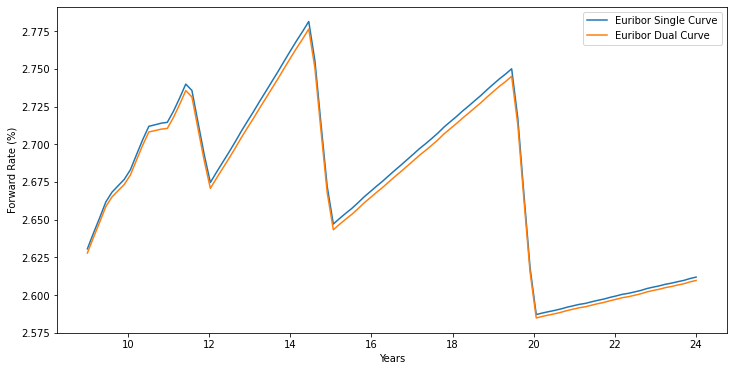

In [15]:
years = np.linspace(9, 24, 100)
dates = settlement_date.add_years(years)

iborSingleCurveFwds = iborSingleCurve.fwd_rate(dates, "6M")    
iborDualCurveFwds = iborDualCurve.fwd_rate(dates, "6M")

plt.figure(figsize=(12,6))
plt.plot(years, iborSingleCurveFwds*100.0, label="Euribor Single Curve")
plt.plot(years, iborDualCurveFwds*100.0, label="Euribor Dual Curve")
plt.xlabel("Years")
plt.ylabel("Forward Rate (%)")
plt.legend();

I calculate the difference between the two curves.

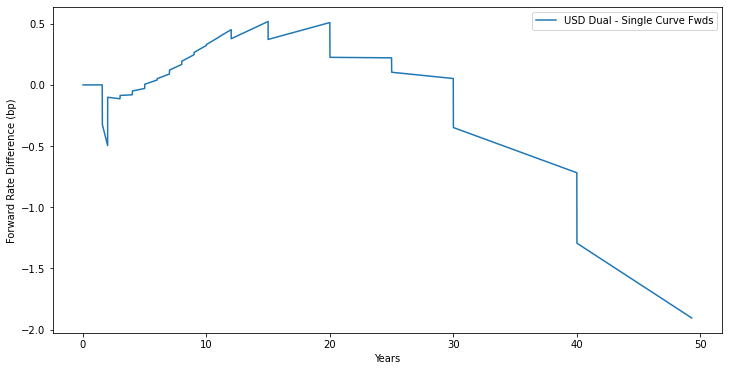

In [16]:
dayMax = 50*360
years = np.linspace(1/365, dayMax/365, dayMax)
dates = settlement_date.add_years(years)

liborSingleCurveFwds = iborSingleCurve.fwd(dates)    
liborDualCurveFwds = iborDualCurve.fwd(dates)

diff = liborSingleCurveFwds - liborDualCurveFwds

plt.figure(figsize=(12,6))
plt.plot(years, diff*10000.0, label="USD Dual - Single Curve Fwds")
plt.xlabel("Years")
plt.ylabel("Forward Rate Difference (bp)")
plt.legend();

Copyright (c) Dominic O'Kane 2020